In [38]:
# Import relevant Python libraries and modules.

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("marketing_sales_data.csv")

In [3]:
# Display the first 10 rows of the data.

data[:10]

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


[Write your response here. Double-click (or enter) to edit.]

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [4]:
# Display number of rows, number of columns.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


**Question:** How many rows and columns exist in the data?

[Write your response here. Double-click (or enter) to edit.]

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [9]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

data.isnull()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [6]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

data.any(axis=1)

0      True
1      True
2      True
3      True
4      True
       ... 
567    True
568    True
569    True
570    True
571    True
Length: 572, dtype: bool

If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [15]:
# Use .sum() to get the number of rows that contain missing values.

data[data.isnull().any(axis=1)]

,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

[Write your response here. Double-click (or enter) to edit.]

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [21]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.

data = data.dropna()
data.isnull().any(axis=1).sum()

0

In [ ]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###


The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

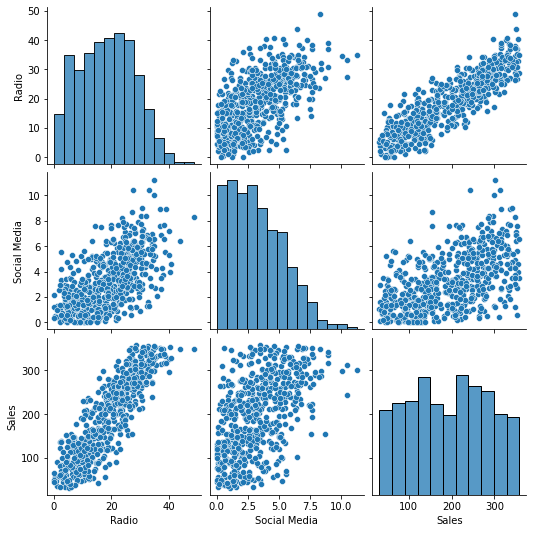

In [23]:
# Create plot of pairwise relationships.

sns.pairplot(data)

In [24]:
# Subset

radio_data = data[['Radio', 'Sales']]

In [25]:
radio_data[:10]

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


In [33]:
# Implement OLS.

model = ols(formula='Sales ~ Radio', data=radio_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 08 Mar 2025   Prob (F-statistic):          2.07e-176
Time:                        04:48:38   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis:

With a p-value of below 0.000, we can reject the null hypotheses and say there is relationship between radio marketing and sales beyond just pure chance.


With each 1M spent on Radio, it should lead to on average a [7.791 - 8.555] M increase in Sales with a 95% Confidence Interval.



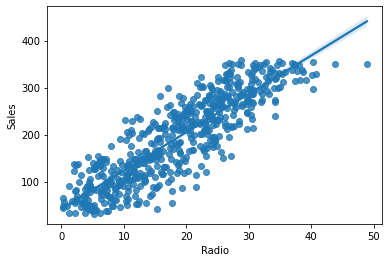

In [31]:
# Check plot for linearity in the Model

sns.regplot(x='Radio', y='Sales', data=data)

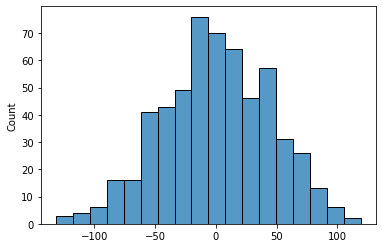

In [36]:
# Check if the residuals of the model are normally distributed via Histogram.

sns.histplot(model.resid)

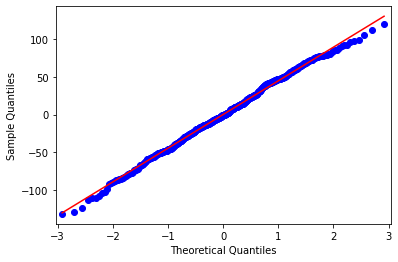

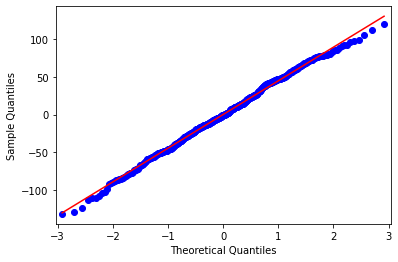

In [41]:
# Check if the residuals of the model are normally distributed via a Q-Q plot

sm.qqplot(data=model.resid, line='s')


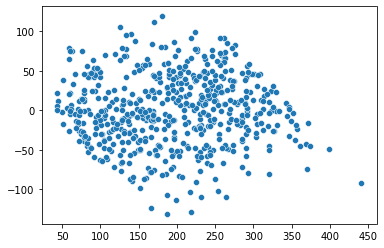

In [46]:
# Create a scatterplot of residuals against fitted values to check for Homoscedasticity

sns.scatterplot(x=model.predict(radio_data['Radio']), y=model.resid)
